In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
netflix=pd.read_csv("/content/sample_data/netflix_titles.csv")

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix.shape

(6234, 12)

In [5]:
if netflix.shape[0]*netflix.shape[1]==netflix.size:
  print("No need to process")
else:
  print("process on Missing Data")

No need to process


In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
netflix.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [9]:
netflix.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [10]:
netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [11]:
miss=netflix.isnull().sum()

In [12]:
miss_data= (netflix.isnull().sum()/len(netflix))*100
print(miss_data)

show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
release_year     0.000000
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [13]:
m=pd.concat([miss,miss_data],axis=1,keys=['Total', 'Missing %'])
print(m)

              Total  Missing %
show_id           0   0.000000
type              0   0.000000
title             0   0.000000
director       1969  31.584857
cast            570   9.143407
country         476   7.635547
date_added       11   0.176452
release_year      0   0.000000
rating           10   0.160411
duration          0   0.000000
listed_in         0   0.000000
description       0   0.000000


<Axes: >

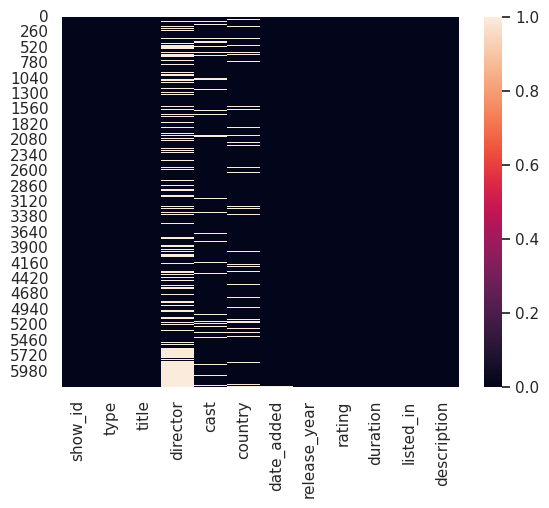

In [14]:
sns.heatmap(netflix.isnull())

In [15]:
netflix2=netflix.copy()
netflix3=netflix2.dropna(how='any',subset=['director','cast'])
print(len(netflix3),len(netflix2))

3909 6234


In [16]:
netflix4=netflix3.fillna({'country':'missing', 'rating':'missing','duration': 'missing'})

In [17]:
print(netflix4.head())

    show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   
9  70304990  Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   
9                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country      

In [18]:
netflix4.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [30]:
pip uninstall pydantic-settings


Found existing installation: pydantic-settings 2.3.4
Uninstalling pydantic-settings-2.3.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pydantic_settings-2.3.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pydantic_settings/*
Proceed (Y/n)? y
  Successfully uninstalled pydantic-settings-2.3.4


In [31]:
pip uninstall pandas_profiling

Found existing installation: pandas-profiling 3.6.6
Uninstalling pandas-profiling-3.6.6:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.10/dist-packages/pandas_profiling-3.6.6.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas_profiling/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-profiling-3.6.6


In [32]:
pip install pydantic-settings

  Using cached pydantic_settings-2.3.4-py3-none-any.whl.metadata (3.3 kB)
Using cached pydantic_settings-2.3.4-py3-none-any.whl (22 kB)


In [35]:
pip install ydata-profiling

In [37]:
import ydata_profiling as prf

In [38]:
netflix_profile = prf.ProfileReport(netflix)
netflix_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
netflix_profile.to_file(output_file="netflix21_before_preprocessing.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [42]:
netflix5=netflix.copy()

In [45]:
netflix5.groupby('type')['title'].count().sort_values(ascending=False)

type
Movie      4265
TV Show    1969
Name: title, dtype: int64

In [46]:
netflix5.type.value_counts().to_frame('value_count')

,value_count
type,
Movie,4265
TV Show,1969


In [51]:
netflix5.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [56]:
netflix5["date_added"] = pd.to_datetime(netflix5['date_added'], format='%B %d, %Y', errors='coerce')
netflix5.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [58]:
netflix5['year_added'] = netflix5["date_added"].dt.year
netflix5['month_added'] = netflix5["date_added"].dt.month
netflix5.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0


In [64]:
netflix5[['release_year','year_added','month_added']].corr()

,release_year,year_added,month_added
release_year,1.000000,0.023812,-0.024577
year_added,0.023812,1.000000,-0.147302
month_added,-0.024577,-0.147302,1.000000


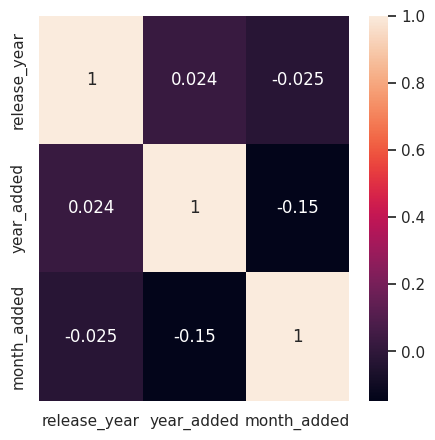

In [65]:
plt.subplots(figsize=(5,5))
sns.heatmap(netflix5[['release_year','year_added','month_added']].corr(),annot=True)
plt.show()